In [1]:
#
# Working through the example from
# https://github.com/kwmcbride/kipet/blob/new_data/kipet/new_examples/Ex_7_concentration_input.py
# Using dataset with missing/irregular data
#

In [2]:
import sys
from kipet import KipetModel

import matplotlib.pyplot as plt

In [3]:
kipet_model = KipetModel()

r1 = kipet_model.new_reaction('reaction-1')   

In [4]:
filename = '/home/paperspace/learn_kipet/data_sets/missing_data.txt'
r1.add_dataset('C_data', category='concentration', file=filename)

the dir is: /home/paperspace/learn_kipet/data_sets
/home/paperspace/learn_kipet/data_sets/missing_data.txt
read dir : /home/paperspace/learn_kipet/data_sets/missing_data.txt


In [14]:
r1.datasets['C_data'].data

,A,B,C
0.0000,0.001027,0.000000,0.000013
0.1667,NaN,0.000041,NaN
0.3334,0.000928,0.000081,NaN
0.5001,NaN,0.000103,NaN
0.6668,0.000847,0.000127,NaN
0.8335,NaN,0.000132,NaN
1.0002,0.000788,0.000144,0.000069
1.1669,NaN,0.000147,NaN
1.3336,0.000733,0.000148,NaN
1.5003,NaN,0.000146,NaN


In [15]:
# Add the model parameters
r1.add_parameter('k1', init=2.0, bounds=(0.0, 5.0))
r1.add_parameter('k2', init=0.2, bounds=(0.0, 2.0))

# Declare the components and give the initial values
r1.add_component('A', state='concentration', init=0.001)
r1.add_component('B', state='concentration', init=0.0)
r1.add_component('C', state='concentration', init=0.0)

In [16]:
# Define the reaction model
def rule_odes(m,t):
    exprs = dict()
    exprs['A'] = -m.P['k1']*m.Z[t,'A']
    exprs['B'] = m.P['k1']*m.Z[t,'A']-m.P['k2']*m.Z[t,'B']
    exprs['C'] = m.P['k2']*m.Z[t,'B']
    return exprs 

r1.add_equations(rule_odes)

In [17]:
# Settings
r1.settings.collocation.nfe = 60
# Run KIPET
r1.settings.solver.linear_solver = 'ma27'
r1.run_opt() 

0 9.8353
    we will be changing that default to 'Reals' in the future.  If you really
    intend the domain of this Param (sigma) to be 'Any', you can suppress this
    warning by explicitly specifying 'within=Any' to the Param constructor.
    (deprecated in 5.6.9, will be removed in 6.0) (called from
    /home/paperspace/my_pyenvs/kipetenv/lib/python3.7/site-
    packages/Pyomo-5.7.1-py3.7-linux-x86_64.egg/pyomo/core/base/param.py:640)
    we will be changing that default to 'Reals' in the future.  If you really
    intend the domain of this Param (sigma) to be 'Any', you can suppress this
    warning by explicitly specifying 'within=Any' to the Param constructor.
    (deprecated in 5.6.9, will be removed in 6.0) (called from
    /home/paperspace/my_pyenvs/kipetenv/lib/python3.7/site-
    packages/Pyomo-5.7.1-py3.7-linux-x86_64.egg/pyomo/core/base/param.py:640)
    we will be changing that default to 'Reals' in the future.  If you really
    intend the domain of this Param (sigma) t


RESULTS
Z:
                  A         B             C
0.000000  0.001000  0.000000  0.000000e+00
0.025847  0.000994  0.000006  7.656246e-08
0.107513  0.000976  0.000023  1.276606e-06
0.166700  0.000963  0.000034  2.995966e-06
0.192547  0.000957  0.000039  3.955348e-06
...            ...       ...           ...
9.609413  0.000114  0.000032  8.534301e-04
9.668600  0.000113  0.000032  8.553749e-04
9.694447  0.000112  0.000032  8.562161e-04
9.776113  0.000110  0.000031  8.588419e-04
9.835300  0.000109  0.000031  8.607150e-04

[181 rows x 3 columns]

Cm:
                A         B         C
0.0000  0.001027  0.000000  0.000013
0.1667       NaN  0.000041       NaN
0.3334  0.000928  0.000081       NaN
0.5001       NaN  0.000103       NaN
0.6668  0.000847  0.000127       NaN
0.8335       NaN  0.000132       NaN
1.0002  0.000788  0.000144  0.000069
1.1669       NaN  0.000147       NaN
1.3336  0.000733  0.000148       NaN
1.5003       NaN  0.000146       NaN
1.6670  0.000682  0.000147       N

In [18]:
# Display the results
r1.results.show_parameters


The estimated parameters are:
k1 0.22575432938324738
k2 1.0230769291447899


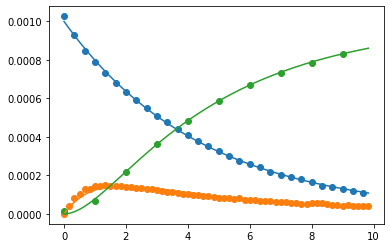

In [19]:
fig, ax = plt.subplots()
for c in ['A','B','C']:
    ax.plot(r1.results.Z.index, r1.results.Z[c])
    ax.scatter(r1.results.Cm.index, r1.results.Cm[c])